<a href="https://colab.research.google.com/github/fcastellanosp/MINE-4210_202420_ADL/blob/main/Laboratorios/Laboratorio%205/MINE4210_ADL2024_Lab5_S2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Logo ADL](https://github.com/fcastellanosp/MINE-4210_202420_ADL/blob/main/Laboratorios/logo_adl.png?raw=true)

**Tutores**.
* Nicolás Tibatá Casteñeda.
* Fabián Camilo Castellanos P.

#Tabla de contenido

[Contexto y objetivos.](#scrollTo=Gm-CkXorSv_r)<br>
[Entendimiento del negocio.](#scrollTo=VmAdljrOTGGC)<br>
[0. Instalación de librerías.](#scrollTo=ymdEVvQHTHjE)<br>
[1. Importar librerías](#scrollTo=NzcrGRCiTsCH)<br>
[2. Introducción a los datos.](#scrollTo=1Y0vo6BLTQEM)<br>
[3. Modelamiento.](#scrollTo=jhNndBZjTWc5)<br>
[4. Preguntas.](#scrollTo=nNueJfhxBjHd)<br>

# **Laboratorio 5 - Sesión 2**
## **Generación de textos**

## **Objetivos**
*  Analizar la arquitecrura de la red GAN.
*  Generar imágenes a partir de una red GAN.

## **Problema**
Toda la información ha sido consolidada en el siguiente [enlace](https://www.kaggle.com/datasets/ruruamour/screw-dataset/data).

# Entendimiento del negocio.

Uno de los grandes avances que se han propuesto a través de la generación de imágenes, donde a mediante las imágenes que se tengan de referencia, pueden ser generados nuevos datos que pueden no existir en algunos casos en la realidad. Por esta razón los almacenes de grandes superficies han consultado a la Universidad de los Andes para ampliar la oferta de tornillos que están en sus bodegas y almacenes.

Para tener un mejor detalle sobre el comportamiento de los datos, solicitamos a la organización nos suministró la información con la siguiente estructura:

```python
dataset/
  train/
    a_image_1.jpg
    a_image_2.jpg
    .......
  test/
    b_image_1.jpg
    b_image_2.jpg
    .......
  train.csv
```

# 0. Instalación de librerías
Para la transformación de los datos, así como para el entrenamiento de los modelos y la visualización de los resultados, se importan las siguientes librerías:

In [1]:
!pip install kaggle

In [2]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.7 MB/s eta 0:00:00


---
# 1. Importar librerías

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

#Librerías de Keras y Tensor Flow
import keras_tuner as kt
import keras.layers as layers
import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras.layers import RandomRotation, RandomFlip, Dropout
from tensorflow.keras.layers import Dense, Reshape, Conv2DTranspose, BatchNormalization, LeakyReLU ######
from tensorflow.keras.layers import Conv2D, Flatten ######
from tensorflow.keras import Sequential

#Librerías de Scikit Learn
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

#Verificamos las versiones de las librerías
print(f"La versión de sklearn es: {sklearn.__version__}")
print('Tensorflow version:', tf.__version__)

La versión de sklearn es: 1.5.2
Tensorflow version: 2.17.0


---
# 2. Introducción a los datos.

##2.1. Parámetros generales y carga de la información.

In [4]:
#Porcentaje para validación y test
test_alpha = 0.2
#random_state o semilla para la reproducibilidad
my_seed = 19

In [5]:
tf.random.set_seed(my_seed)
np.random.seed(my_seed)

In [6]:
batch_size = 24
img_height = 128
img_width = 128
band_count = 3
image_size = [img_height, img_width]

## 2.2. Configuración del entorno de kaggle.

Cargamos el archivo de credenciales de Kaggle:

In [7]:
!ls -lha kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 69 Nov  7 09:29 kaggle.json


Verificamos la conectividad con kaggle, usando un comando para ver una previsualización de datasets:

In [8]:
!kaggle datasets list

ref                                                              title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
valakhorasani/mobile-device-usage-and-user-behavior-dataset      Mobile Device Usage and User Behavior Dataset   11KB  2024-09-28 20:21:12          20089        418  1.0              
valakhorasani/gym-members-exercise-dataset                       Gym Members Exercise Dataset                    22KB  2024-10-06 11:27:38          11336        174  1.0              
muhammadroshaanriaz/students-performance-dataset-cleaned         Students Performance | Clean Dataset            10KB  2024-10-29 19:32:26           1461         33  1.0              
mahdiehhajian/life-expectancy-around-the-world                   Life expectancy

Una vez hemos asegurado la conectividad, procedemos a realizar el proceso de descarga de la información del negocio.

In [9]:
!kaggle datasets download ruruamour/screw-dataset

Dataset URL: https://www.kaggle.com/datasets/ruruamour/screw-dataset
License(s): CC-BY-NC-SA-4.0
 86% 161M/186M [00:01<00:00, 139MB/s]
100% 186M/186M [00:01<00:00, 165MB/s]


## 2.3. Preparación de datos.

Para la información que vamos a descomprimir, es necesario crear un un directorio para que el contenido del archivo zip, se encuentre allí. Para este propósito, vamos a crear unas variables de manejo de archivos:

In [10]:
ROOT_DIR = '/content'
DATASET_NAME = 'screw-dataset'

Vamos ahora a generar una previsualización del comando de descompresión del archivo zip:

In [11]:
print(f"!unzip {DATASET_NAME}.zip -d {ROOT_DIR}")

!unzip screw-dataset.zip -d /content


Ahora si vamos a consolidar el bloque de comandos con todos los pasos para la descompresión del archivo zip:

In [12]:
%cd {ROOT_DIR}
!mkdir /{DATASET_NAME}
!unzip {DATASET_NAME}.zip -d {ROOT_DIR}/{DATASET_NAME}

/content
Archive:  screw-dataset.zip
  inflating: /content/screw-dataset/license.txt  
  inflating: /content/screw-dataset/sample_submit.csv  
  inflating: /content/screw-dataset/test/test_0.png  
  inflating: /content/screw-dataset/test/test_1.png  
  inflating: /content/screw-dataset/test/test_10.png  
  inflating: /content/screw-dataset/test/test_100.png  
  inflating: /content/screw-dataset/test/test_101.png  
  inflating: /content/screw-dataset/test/test_102.png  
  inflating: /content/screw-dataset/test/test_103.png  
  inflating: /content/screw-dataset/test/test_104.png  
  inflating: /content/screw-dataset/test/test_105.png  
  inflating: /content/screw-dataset/test/test_106.png  
  inflating: /content/screw-dataset/test/test_107.png  
  inflating: /content/screw-dataset/test/test_108.png  
  inflating: /content/screw-dataset/test/test_109.png  
  inflating: /content/screw-dataset/test/test_11.png  
  inflating: /content/screw-dataset/test/test_110.png  
  inflating: /content/s

Generamos una variable con la ruta de la información, de esta forma la podemos usar en los casos que sea requerido el acceso a los datos:

In [13]:
DATA_DIR = f"{ROOT_DIR}/{DATASET_NAME}"
print(DATA_DIR)

/content/screw-dataset


### 2.3.1. Separación de conjuntos de datos

Generamos las particiones de los datos (80% train, 10% validación, 10% test):

In [14]:
f"{DATA_DIR}/train"

'/content/screw-dataset/train'

In [15]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  f"{DATA_DIR}/train",
  labels=None,
  validation_split=test_alpha,
  subset="training",
  seed=my_seed,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 300 files.
Using 240 files for training.


In [16]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    f"{DATA_DIR}/train",
    labels=None,
    validation_split=test_alpha / 2,
    subset="validation",
    seed=my_seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 300 files.
Using 30 files for validation.


In [17]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    f"{DATA_DIR}/test",
    labels=None,
    validation_split=test_alpha / 2,
    subset="validation",
    seed=my_seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 180 files.
Using 18 files for validation.


In [18]:
print("----------Train----------")
for images in train_ds.take(1):
  print("Núm. Imágenes:", images.shape)

print("----------Validation----------")
for images in val_ds.take(1):
  print("Núm. Imágenes:", images.shape)

print("----------Test----------")
for images in test_ds.take(1):
  print("Núm. Imágenes:", images.shape)

----------Train----------
Núm. Imágenes: (24, 128, 128, 3)
----------Validation----------
Núm. Imágenes: (24, 128, 128, 3)
----------Test----------
Núm. Imágenes: (18, 128, 128, 3)


Demos un vistazo a algunos de los datos:

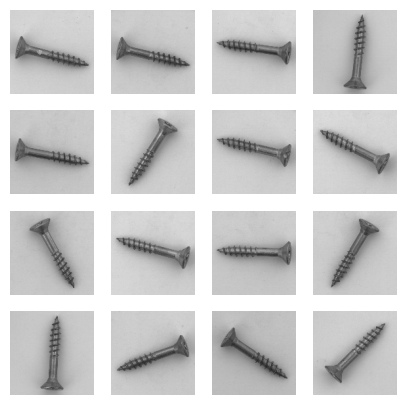

In [19]:
plt.figure(figsize=(5, 5))

df = train_ds.take(1)
for images in df:
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

### 2.3.2. Aumentación de los datos

Definimos unas funciones de apoyo para este proceso:

In [20]:
def convert_to_float(image):
  return tf.image.convert_image_dtype(image, dtype=tf.float32)

def trans1(img):
  img = tf.image.flip_left_right(img)
  img = tf.image.flip_up_down(img)
  img = tf.image.rot90(img, k=1)
  return img

def trans2(img):
  img = tf.image.rot90(img, k=3)
  return img

def trans3(img):
  img = tf.image.rot90(img, k=1)
  return img

Unimos los pasos anteriores para ensamblar el conjunto de datos aumentado:

In [21]:
train_a_ds = train_ds
ds2 = train_ds.map(lambda x: trans1(x))
ds3 = train_ds.map(lambda x: trans2(x))
ds4 = train_ds.map(lambda x: trans3(x))

In [22]:
train_a_ds = train_a_ds.concatenate(ds2).concatenate(ds3).concatenate(ds4)
train_a_ds

<_ConcatenateDataset element_spec=TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None)>

Optimizamos el dataset con Autotune:

In [23]:
AUTOTUNE = tf.data.AUTOTUNE
train_a_ds = (
    train_a_ds
    .map(convert_to_float, num_parallel_calls=AUTOTUNE)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

Visualizamos los datos aument

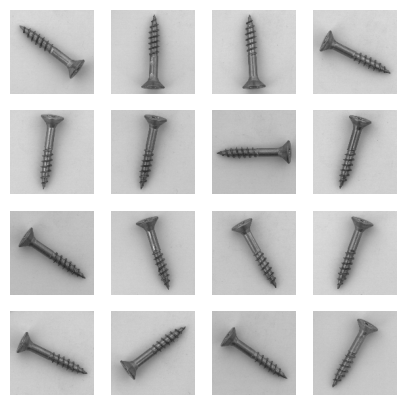

In [24]:
plt.figure(figsize=(5, 5))

df = train_a_ds.take(1)
for images in df:
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

In [25]:
new_train_ds = train_a_ds.map(lambda x: x / 255.0)
new_test_ds = test_ds.map(lambda x: x / 255.0)

# Preparar el dataset para entrenamiento y validación
new_train_ds = new_train_ds.cache().prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
new_test_ds = new_test_ds.cache().prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

---
# 3. Modelamiento.

Primero, necesitamos construir el generador y el discriminador. El generador es similar al decodificador de un autoencoder, y el discriminador es un clasificador binario normal: toma una imagen como entrada y termina con una capa Densa que contiene una única unidad y utiliza la función de activación sigmoide.

Para la segunda fase de cada iteración de entrenamiento, también necesitamos el modelo GAN completo que contiene el generador seguido del discriminador:

In [26]:
codings_size = 128

generator = tf.keras.Sequential([
    Dense(64, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    Dense(128, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    Dense(img_height * img_width * band_count, activation="sigmoid"),
    tf.keras.layers.Reshape([img_height, img_width, band_count])
])

discriminator = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    Dense(128, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    Dense(64, activation="relu", kernel_initializer="he_normal"),
    Dense(1, activation="sigmoid") # Booleano para discriminar si es verdadero o falso
])

gan = tf.keras.Sequential([generator, discriminator])

A continuación, tenemos que compilar estos modelos. Como el discriminador es un clasificador binario, podemos utiliza binary_crossentropy. El modelo gan también es un clasificador binario, por lo que también puede utilizar binary_crossentropy. Sin embargo, el generador sólo se entrenará a través del modelo gan, por lo que no necesitamos compilarlo en absoluto. Es importante destacar que el discriminador no debe ser entrenado durante la segunda fase, por lo que lo hacemos no entrenable antes de compilar el modelo gan:

In [27]:
discriminator.compile(loss="binary_crossentropy", optimizer="adam")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="adam")

Dado que el bucle de entrenamiento es inusual, no podemos utilizar el método fit() normal. En su lugar, escribiremos función para realizar el entrenamiento. Para ello, primero tenemos que crear un conjunto de datos para iterar a través de las imágenes:

In [28]:
dataset = train_a_ds.shuffle(buffer_size=1000)

In [29]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs):
  generator, discriminator = gan.layers
  for epoch in range(n_epochs):
    print("Epoch {}/{}".format(epoch + 1, n_epochs))
    for X_batch in dataset:
      # Fase 1 - Entrenar el discriminador
      noise = tf.random.normal(shape=[batch_size, codings_size])
      generated_images = generator(noise)

      X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
      y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
      discriminator.train_on_batch(X_fake_and_real, y1)
      # Fase 2 - Entrenar el generador
      noise = tf.random.normal(shape=[batch_size, codings_size])
      y2 = tf.constant([[1.]] * batch_size)
      gan.train_on_batch(noise, y2)

In [30]:
train_gan(gan, dataset, batch_size, codings_size, n_epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78/100
Epoch 7

Después del entrenamiento, podemos muestrear aleatoriamente algunas codificaciones de una distribución gaussiana, y alimentarlas al generador para producir nuevas imágenes:

In [37]:
plt.figure(figsize=(5, 5))
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image)
        plt.axis("off")

<Figure size 500x500 with 0 Axes>

(24, 128, 128, 3)


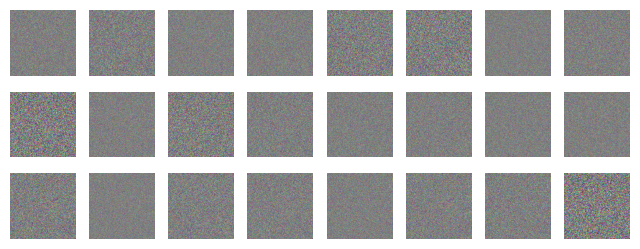

In [43]:
noise = tf.random.normal(shape=[batch_size, codings_size])
generated_images = generator(noise, training=False)
print(generated_images.shape)
plot_multiple_images(generated_images, 8)

---
# 4. Preguntas

* ¿Cómo usarías los datos de prueba en el proceso?
* ¿Cómo podrías mejorar el resultado?